In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
%matplotlib inline 

# Parte 1:

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 1. Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).

In [29]:
x = df['total_bill'].values.reshape(-1,1)
y = df['tip']
reg = LinearRegression().fit(x, y)
y_predict = reg.predict(x)

#### 2. Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado.

In [30]:
mean_squared_error(y, y_predict)

1.036019442011377

#### 3. Mostre na tela os valores dos pesos (parâmetros).

In [31]:
print(f'W0 = {reg.intercept_}')
print(f'W1 = {reg.coef_}')

W0 = 0.9202696135546731
W1 = [0.10502452]


#### 4. Para um valor de entrada de 30, qual a predição do modelo?

In [32]:
reg.predict([[30]])

array([4.07100514])

#### 5. Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo.

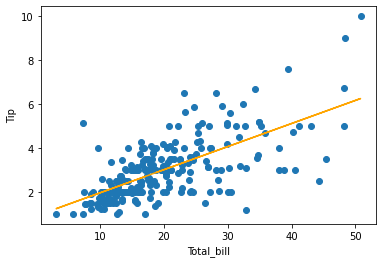

In [33]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='orange')
plt.xlabel('Total_bill')
plt.ylabel('Tip')
plt.show()

# Parte 2:

In [34]:
df_h = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')
df_h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [35]:
df_h.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


#### 1. Considere que haja um problema de regressão no qual desejamos criar um modelo que faça a predição do valor mediano das casas de um distrito ('median_house_value') com base em outras informações. Crie pelo menos 3 modelos que façam essa predição utilizando mais de uma variável de entrada e compare a diferença de MSE.

##### 1° Modelo

Critério de escolha: As duas colunas escolhidas apresentam alta correlação com a median_house_value, e ao mesmo tempo são independentes entre si.

In [36]:
X = df_h[['median_income', 'housing_median_age']].to_numpy()
y = df_h['median_house_value']
reg.fit(X,y)
print(mean_squared_error(reg.predict(X), y))
print(reg.score(X,y))

6535814191.460647
0.5141179623105907


##### 2° Modelo

Critério de escolha: São as três variaveis que apresentam maior correlação com a 'median_house_value', no entanto, a coluna 'total_rooms' apresenta correlação consideravel com a 'median_income'.

In [37]:
X = df_h[['median_income', 'total_rooms', 'housing_median_age']].to_numpy()
y = df_h['median_house_value']
reg.fit(X,y)
print(mean_squared_error(reg.predict(X), y))
print(reg.score(X,y))

6478692108.326553
0.5183645019668924


##### 3° Modelo

Critério de escolha: A três variaveis ja citadas anteriormente apresentam alta correlação com a 'median_house_value'. A 'total_bedrooms' embora apresente uma correlação menor que as outras, também apresenta certa correlação com a coluna alvo, no entanto, apresenta alta dependência com a coluna 'total_rooms'.

In [38]:
X = df_h[['median_income', 'housing_median_age', 'total_bedrooms', 'total_rooms']].to_numpy()
y = df_h['median_house_value']
reg.fit(X,y)
print(mean_squared_error(reg.predict(X), y))
print(reg.score(X,y))

6019552755.428558
0.5524975966103951


##### Qual o melhor modelo encontrado? Justifique a escolha das variáveis.


Pela minha análise o melhor modelo encontrado foi o 2°, pois além de apresentar um MSE menor do que o 1° modelo, ele não apresenta grande depêndencia entre as variáveis.

# Parte 3:

#### 2.Considerando o mesmo problema tratado na Parte 2, treine modelos de regressão utilizando transformações não-lineares dos atributos (x², x³, etc...). Pode-se utilizar transformações em um ou mais atributos. Treine pelo menos 3 modelos diferentes e faça o plot das curvas de regressão comparada com o scatterplot (análogo ao que foi feito na questão 5 da Parte 1). Calcule o MSE para cada um dos modelos. Qual modelo se ajustou melhor aos dados em termos de MSE?

##### 1° Modelo:

MSE: 6843429367.794663


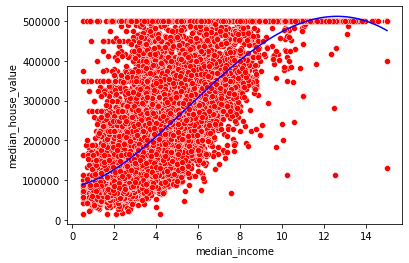

In [39]:
X = df_h['median_income'].to_numpy().reshape(-1,1)
y = df_h['median_house_value'].to_numpy().reshape(-1,1)

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
polyreg = make_pipeline(PolynomialFeatures(degree = 4),LinearRegression())
polyreg.fit(X,y)

print(f'MSE: {mean_squared_error(polyreg.predict(X), y)}')

sns.scatterplot(x = 'median_income', y = 'median_house_value', data = df_h, color = 'red')
plt.plot(X_seq,polyreg.predict(X_seq),color = 'blue')

##### 2° Modelo

MSE: 13066424472.545803


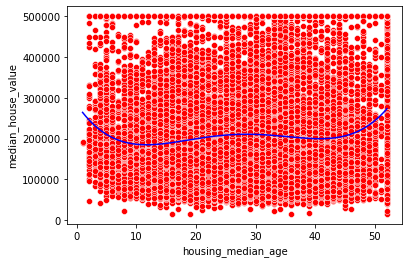

In [42]:
X = df_h['housing_median_age'].to_numpy().reshape(-1,1)
y = df_h['median_house_value'].to_numpy().reshape(-1,1)

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

polyreg = make_pipeline(PolynomialFeatures(degree = 4),LinearRegression())
polyreg.fit(X,y)

print(f'MSE: {mean_squared_error(polyreg.predict(X), y)}')

sns.scatterplot(x = 'housing_median_age', y = 'median_house_value', data = df_h, color = 'red')
plt.plot(X_seq,polyreg.predict(X_seq),color = 'blue')

##### 3° Modelo

MSE: 13024381744.962206


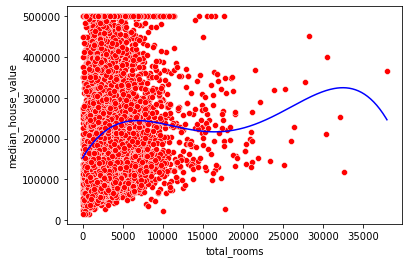

In [43]:
X = df_h['total_rooms'].to_numpy().reshape(-1,1)
y = df_h['median_house_value'].to_numpy().reshape(-1,1)

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

polyreg = make_pipeline(PolynomialFeatures(degree = 4),LinearRegression())
polyreg.fit(X,y)

print(f'MSE: {mean_squared_error(polyreg.predict(X), y)}')

sns.scatterplot(x = 'total_rooms', y = 'median_house_value', data = df_h, color = 'red')
plt.plot(X_seq,polyreg.predict(X_seq),color = 'blue')

##### Qual modelo se ajustou melhor aos dados em termos de MSE?

 O primeiro modelo apresentou um MSE muito inferior aos outros dois, logo, ele se ajustou melhor aos dados.